# Different than sorting units. Want a way to remove just a few really bad spikes

L-infinity norm seems to work well for this (or at least it matches my intuition)

## Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import glob
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import find_peaks, medfilt
from scipy.interpolate import interp1d, UnivariateSpline
from scipy.stats import zscore

from mosquito.process_abf import load_processed_data, estimate_spike_rate, save_processed_data
from mosquito.util import idx_by_thresh, my_adjust_axes, hampel, set_plot_params, my_add_scalebar

## Params

In [4]:
plt.style.use('dark_background')
# plt.style.use('default')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize for x tick labels
plt.rc('ytick', labelsize=14)    # fontsize for y tick labels

plot_type = 'poster'  # 'paper' or 'powerpoint' or 'poster
plot_params = set_plot_params(plot_type=plot_type)

## Helper functions

## Load data

In [5]:
# Which data files to look at
data_folder = '84_20250313'
axo_num = 2

data = load_processed_data(data_folder, axo_num)

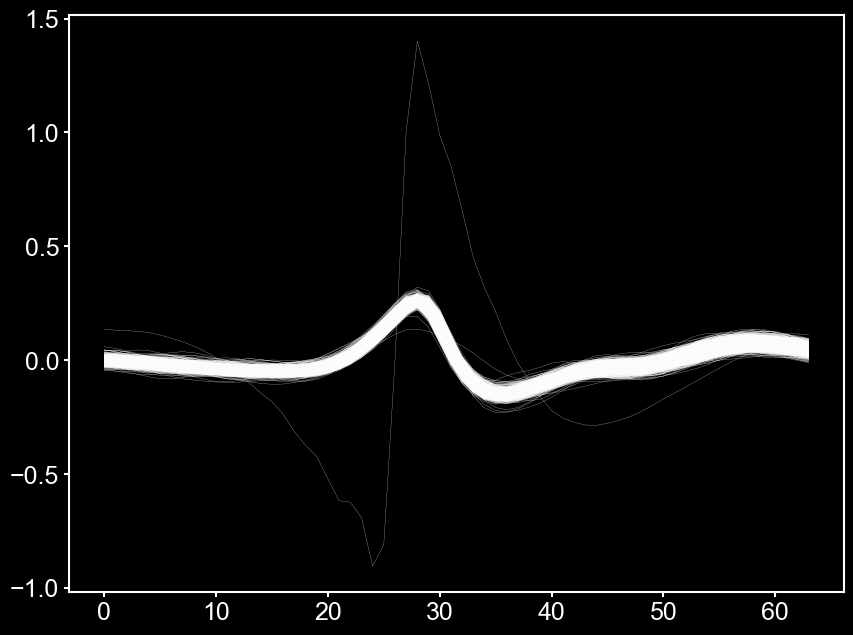

In [10]:
# read out spikes
spikes = data['spikes']

# visualize
fig, ax = plt.subplots()
for spike in spikes:
    ax.plot(spike, color='w', alpha=0.8, lw=0.2)

In [18]:
# get the distance between each spike and the median spike
spike_median = np.median(spikes, axis=0)
spike_diff = np.max(np.abs((spikes - spike_median)), axis=1)


In [32]:
# z score those distances
z_thresh = 3
spike_diff_z = zscore(spike_diff)
bad_ind = np.where(spike_diff_z > z_thresh)[0]


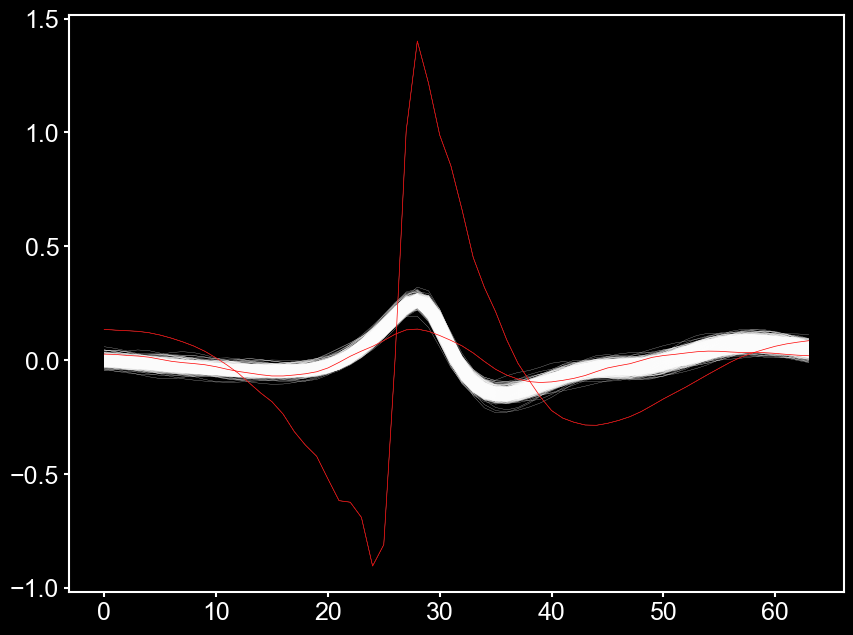

In [33]:
# plot again but this time highlight "bad ind"
fig, ax = plt.subplots()
for spike in spikes:
    ax.plot(spike, color='w', alpha=0.8, lw=0.2)

for ind in bad_ind:
    ax.plot(spikes[ind,:], color='r', alpha=1.0, lw=0.5)

In [34]:
bad_ind

array([1230, 1745])